# Import Packages

In [ ]:
import kagglehub

import os
import glob
import random

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split, learning_curve as sk_learning_curve
import sklearn.preprocessing as sk_preprocess
from sklearn.pipeline import Pipeline as sk_pipeline
import sklearn.multioutput as sk_multioutput
import sklearn.multiclass as sk_multiclass
import sklearn.linear_model as sk_linear
import sklearn.tree as sk_tree
import sklearn.ensemble as sk_ensemble
import sklearn.neighbors as sk_neighbors
import sklearn.naive_bayes as sk_naive_bayes
import sklearn.svm as sk_svm
import sklearn.metrics as sk_metrics
import sklearn.gaussian_process as sk_gaussian_process
import sklearn.cross_decomposition as sk_cross_decomposition
import sklearn.neural_network as sk_neural_network

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers as keras_layers

import cv2
import skimage


In [ ]:
tf.__version__

'2.18.0'

In [ ]:
sklearn.__version__

'1.6.1'

# Download Data From Kaggle

In [ ]:
!chmod 600 ~/ /content/drive/MyDrive/Hackathons/kaggle

In [ ]:
!kaggle datasets download -d saliltirodkar/ice-cream-sales-analysis-temperature-and-weather

Dataset URL: https://www.kaggle.com/datasets/saliltirodkar/ice-cream-sales-analysis-temperature-and-weather
License(s): CC0-1.0
  0% 0.00/514 [00:00<?, ?B/s]
100% 514/514 [00:00<00:00, 245kB/s]


In [ ]:
!unzip /content/ice-cream-sales-analysis-temperature-and-weather.zip

Archive:  /content/ice-cream-sales-analysis-temperature-and-weather.zip
  inflating: Icecream Sales wr Rain and Temperature.csv  


# Read The Download CSV File

In [ ]:
df = pd.read_csv("/content/Icecream Sales wr Rain and Temperature.csv")

In [ ]:
df.head()

,Temperature (F),Ice-cream Price ($),Number of Tourists (thousands),"Ice Cream Sales ($,thousands)",Did it rain on that day?
0,80.6,1.0,89.5,90,No
1,75.2,1.0,86.4,85,No
2,86.0,2.0,99.2,107,No
3,75.2,2.0,72.4,71,Yes
4,60.8,2.0,71.2,65,Yes


In [ ]:
len(df)

20

# Make Evaluate Function

In [ ]:
def plot_evaluate_model(y_true, y_pred):
  sns.scatterplot(x=y_true, y=y_pred, alpha=0.7, edgecolors='k', color="royalblue", s=80, label="Predictions")

  sns.regplot(x=y_true, y=y_pred, scatter=False, color='green', line_kws={"lw": 2}, label="Trend Line")

  plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--', lw=2, label="Perfect Prediction")

  plt.xlabel("True Labels (y_test)", fontsize=14)
  plt.ylabel("Predicted Labels (y_pred)", fontsize=14)
  plt.title("True vs. Predicted Labels", fontsize=16)

  plt.grid(True, linestyle="--", alpha=0.6)
  plt.legend(fontsize=12)
  plt.show()

In [ ]:
def evaluate_model(y_true, y_pred):
    metrics = {}

    metrics["MAE"] = sk_metrics.mean_absolute_error(y_true, y_pred)
    metrics["MSE"] = sk_metrics.mean_squared_error(y_true, y_pred)
    metrics["RMSE"] = np.sqrt(metrics["MSE"])
    metrics["MSLE"] = sk_metrics.mean_squared_log_error(y_true, np.maximum(y_pred, 0))
    metrics["MAPE"] = sk_metrics.mean_absolute_percentage_error(y_true, y_pred)
    metrics["MedAE"] = sk_metrics.median_absolute_error(y_true, y_pred)
    metrics["R2"] = sk_metrics.r2_score(y_true, y_pred)
    metrics["Explained Variance"] = sk_metrics.explained_variance_score(y_true, y_pred)

    return metrics

# Data Visualization

In [ ]:
df.head()

,Temperature (F),Ice-cream Price ($),Number of Tourists (thousands),"Ice Cream Sales ($,thousands)",Did it rain on that day?
0,80.6,1.0,89.5,90,No
1,75.2,1.0,86.4,85,No
2,86.0,2.0,99.2,107,No
3,75.2,2.0,72.4,71,Yes
4,60.8,2.0,71.2,65,Yes


In [ ]:
df.isna().sum()

,0
Temperature (F),0
Ice-cream Price ($),0
Number of Tourists (thousands),0
"Ice Cream Sales ($,thousands)",0
Did it rain on that day?,0


In [ ]:
df.dtypes

,0
Temperature (F),float64
Ice-cream Price ($),float64
Number of Tourists (thousands),float64
"Ice Cream Sales ($,thousands)",int64
Did it rain on that day?,object


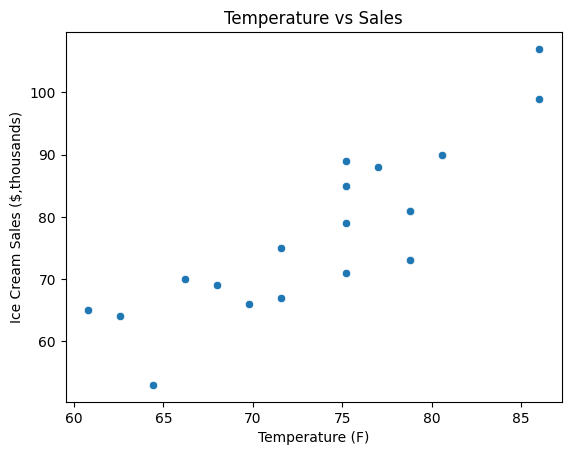

In [ ]:
sns.scatterplot(x=df["Temperature (F)"], y = df["Ice Cream Sales ($,thousands)"])
plt.title("Temperature vs Sales")
plt.show()

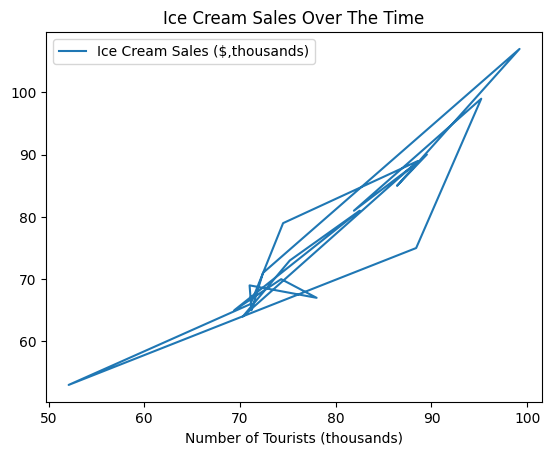

In [ ]:
df.plot(x="Number of Tourists (thousands)", y="Ice Cream Sales ($,thousands)", kind="line")
plt.title("Ice Cream Sales Over The Time")
plt.show()

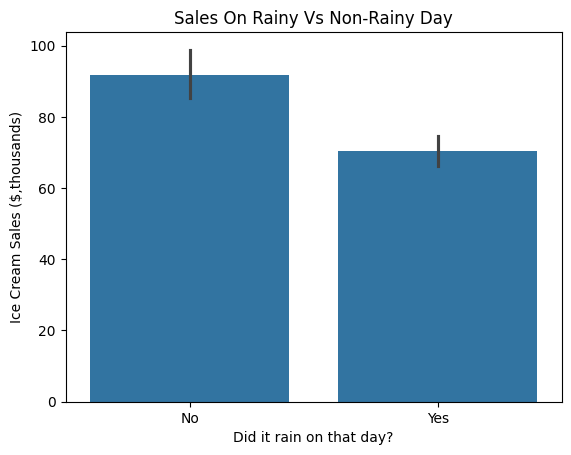

In [ ]:
sns.barplot(x = df["Did it rain on that day?"], y = df["Ice Cream Sales ($,thousands)"])
plt.title("Sales On Rainy Vs Non-Rainy Day")
plt.show()

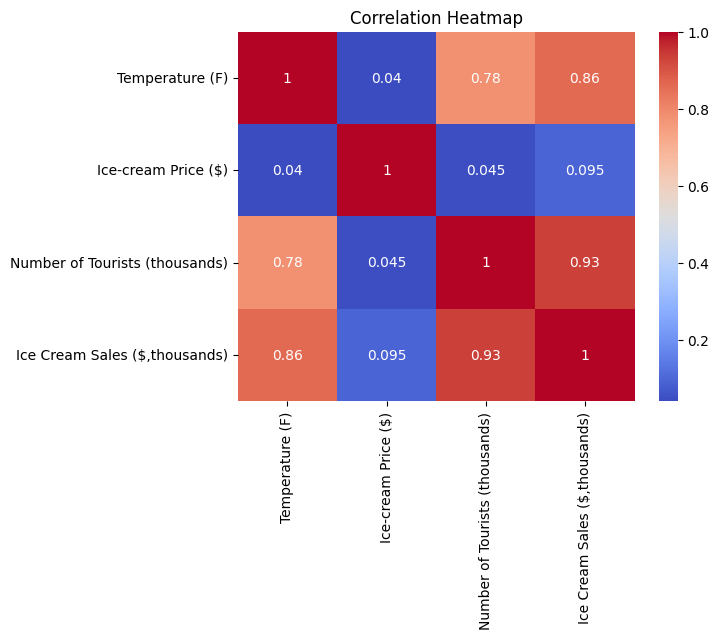

In [ ]:
correction_metrix = df.corr(numeric_only=True)
sns.heatmap(correction_metrix, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

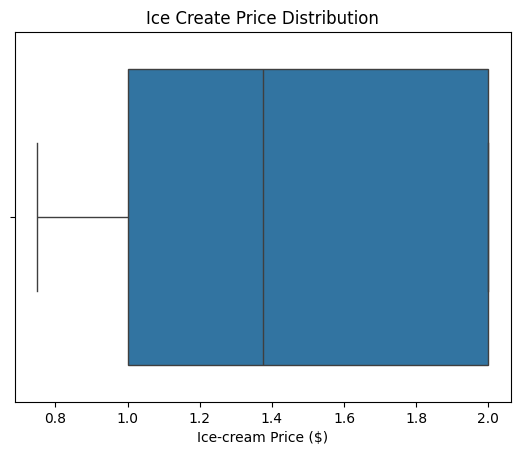

In [ ]:
sns.boxplot(x=df["Ice-cream Price ($)"])
plt.title("Ice Create Price Distribution")
plt.show()

# Preprocess The Datasets

In [ ]:
df.head(1)

,Temperature (F),Ice-cream Price ($),Number of Tourists (thousands),"Ice Cream Sales ($,thousands)",Did it rain on that day?
0,80.6,1.0,89.5,90,No


In [ ]:
df["Did it rain on that day?"] = df["Did it rain on that day?"].map({"No": 0, "Yes": 1})

In [ ]:
df.head(5)

,Temperature (F),Ice-cream Price ($),Number of Tourists (thousands),"Ice Cream Sales ($,thousands)",Did it rain on that day?
0,80.6,1.0,89.5,90,0
1,75.2,1.0,86.4,85,0
2,86.0,2.0,99.2,107,0
3,75.2,2.0,72.4,71,1
4,60.8,2.0,71.2,65,1


In [ ]:
scaler = sk_preprocess.StandardScaler()

In [ ]:
columns = df.columns.drop("Ice Cream Sales ($,thousands)").to_numpy()
columns

array(['Temperature (F)', 'Ice-cream Price ($)',
       'Number of Tourists (thousands)', 'Did it rain on that day?'],
      dtype=object)

In [ ]:
df[columns] = scaler.fit_transform(df[columns])

In [ ]:
df.head()

,Temperature (F),Ice-cream Price ($),Number of Tourists (thousands),"Ice Cream Sales ($,thousands)",Did it rain on that day?
0,1.008676,-0.749026,0.984206,90,-1.527525
1,0.279513,-0.749026,0.694871,85,-1.527525
2,1.737839,1.317253,1.889545,107,-1.527525
3,0.279513,1.317253,-0.611804,71,0.654654
4,-1.664923,1.317253,-0.723805,65,0.654654


# Split X and y

In [ ]:
X = df.drop("Ice Cream Sales ($,thousands)", axis = 1).to_numpy()
y = df["Ice Cream Sales ($,thousands)"].to_numpy()

In [ ]:
X

array([[ 1.008676  , -0.7490265 ,  0.98420619, -1.52752523],
       [ 0.27951263, -0.7490265 ,  0.69487104, -1.52752523],
       [ 1.73783937,  1.3172535 ,  1.88954521, -1.52752523],
       [ 0.27951263,  1.3172535 , -0.61180385,  0.65465367],
       [-1.66492303,  1.3172535 , -0.72380455,  0.65465367],
       [-0.6927052 ,  1.3172535 , -0.74247133,  0.65465367],
       [-0.20659629, -0.2324565 , -0.08913389,  0.65465367],
       [-0.93575966,  0.2841135 , -0.4344694 ,  0.65465367],
       [-1.66492303,  0.2841135 , -0.89180561,  0.65465367],
       [ 0.76562154,  0.2841135 ,  0.33086875,  0.65465367],
       [ 0.76562154,  0.2841135 , -0.35046887,  0.65465367],
       [-1.42186857, -0.7490265 , -0.80780508,  0.65465367],
       [ 0.27951263, -0.7490265 ,  0.90020566,  0.65465367],
       [ 0.27951263, -0.7490265 , -0.41580261,  0.65465367],
       [-0.44965074, -1.2655965 , -0.73313794,  0.65465367],
       [-1.17881411, -1.2655965 , -2.50648242,  0.65465367],
       [-0.20659629, -1.

In [ ]:
y

array([ 90,  85, 107,  71,  65,  69,  67,  70,  65,  81,  73,  64,  89,
        79,  66,  53,  75,  99,  81,  88])

# Split Train And Test

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size = 0.20,
    random_state = 42
)

In [ ]:
len(X_train), len(X_test), len(y_train), len(y_test)

(16, 4, 16, 4)

# Model 1: Linear Regression

In [ ]:
model_1 = sk_linear.LinearRegression()

In [ ]:
model_1.fit(X_train, y_train)

LinearRegression()

In [ ]:
model_1_preds = model_1.predict(X_test)

In [ ]:
model_1_preds

array([89.62970039, 96.35905864, 47.53745049, 84.55352306])

In [ ]:
y_test

array([90, 99, 53, 85])

In [ ]:
model_1_results = evaluate_model(y_test, model_1_preds)
model_1_results

{'MAE': 2.2300668563498647,
 'MSE': 9.287620480393365,
 'RMSE': 3.0475597582973437,
 'MSLE': 0.003033482017120483,
 'MAPE': 0.034777564326472166,
 'MedAE': 1.5437091528530615,
 'R2': 0.9691120499508846,
 'Explained Variance': 0.9856514743825294}

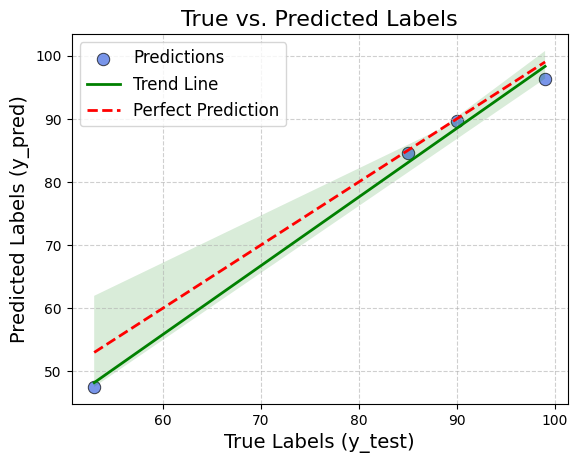

In [ ]:
plot_evaluate_model(y_test, model_1_preds)

# Model 2: Support Vector Regressor

In [ ]:
model_2 = sk_svm.SVR()

In [ ]:
model_2.fit(X_train, y_train)

SVR()

In [ ]:
model_2_preds = model_2.predict(X_test)

In [ ]:
model_2_preds

array([73.98513231, 73.40941322, 72.01424665, 73.86365657])

In [ ]:
y_test

array([90, 99, 53, 85])

In [ ]:
model_2_results = evaluate_model(y_test, model_2_preds)
model_2_results

{'MAE': 17.93901113831507,
 'MSE': 349.22845989273344,
 'RMSE': 18.68765528076579,
 'MSLE': 0.05876955562932342,
 'MAPE': 0.23155223143864023,
 'MedAE': 17.514557170964977,
 'R2': -0.1614332484480847,
 'Explained Variance': 0.07501400021958216}

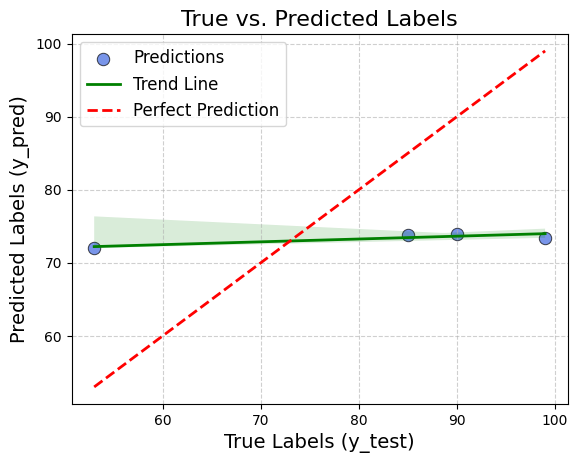

In [ ]:
plot_evaluate_model(y_test, model_2_preds)

# Model 3: SGD Regressor

In [ ]:
model_3 = sk_linear.SGDRegressor()

In [ ]:
model_3.fit(X_train, y_train)

SGDRegressor()

In [ ]:
model_3_preds = model_3.predict(X_test)

In [ ]:
model_3_preds

array([87.75986139, 94.58904306, 44.32090056, 82.54246765])

In [ ]:
y_test

array([90, 99, 53, 85])

In [ ]:
model_3_results = evaluate_model(y_test, model_3_preds)
model_3_results

{'MAE': 4.446931834546611,
 'MSE': 26.4602486100258,
 'RMSE': 5.1439526251731555,
 'MSLE': 0.008549362067240714,
 'MAPE': 0.06552857202186477,
 'MedAE': 3.4342446448316863,
 'R2': 0.9120008360506313,
 'Explained Variance': 0.9777674633334551}

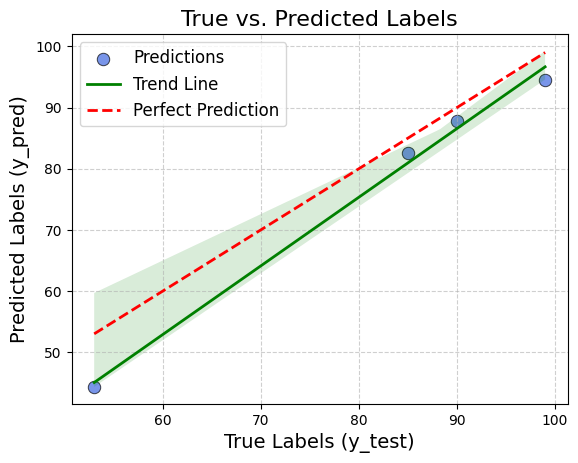

In [ ]:
plot_evaluate_model(y_test, model_3_preds)

# Model 4: K Nearest Neighbors Regression

In [ ]:
model_4 = sk_neighbors.KNeighborsRegressor()

In [ ]:
model_4.fit(X_train, y_train)

KNeighborsRegressor()

In [ ]:
model_4_preds = model_4.predict(X_test)

In [ ]:
model_4_preds

array([89.2, 88. , 68.8, 80. ])

In [ ]:
y_test

array([90, 99, 53, 85])

In [ ]:
model_4_results = evaluate_model(y_test, model_4_preds)
model_4_results

{'MAE': 8.149999999999999,
 'MSE': 99.06999999999998,
 'RMSE': 9.953391381835639,
 'MSLE': 0.02077877290293643,
 'MAPE': 0.11923418423973361,
 'MedAE': 8.0,
 'R2': 0.6705217210559136,
 'Explained Variance': 0.6707295780503015}

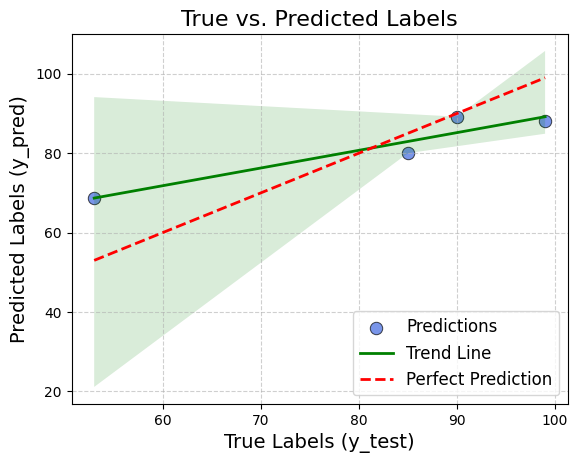

In [ ]:
plot_evaluate_model(y_test, model_4_preds)

# Model 5: Gaussian Process Regression

In [ ]:
model_5 = sk_gaussian_process.GaussianProcessRegressor()

In [ ]:
model_5.fit(X_train, y_train)

GaussianProcessRegressor()

In [ ]:
model_5_preds = model_5.predict(X_test)

In [ ]:
model_5_preds

array([18.85600401,  6.00273365, 12.41088436, 16.97436169])

In [ ]:
y_test

array([90, 99, 53, 85])

In [ ]:
model_5_results = evaluate_model(y_test, model_5_preds)
model_5_results

{'MAE': 68.18900407167988,
 'MSE': 4996.230872387764,
 'RMSE': 70.6840213371294,
 'MSLE': 3.444461319557773,
 'MAPE': 0.8239972921990527,
 'MedAE': 69.58481714879292,
 'R2': -15.616024518437793,
 'Explained Variance': -0.1523279022247026}

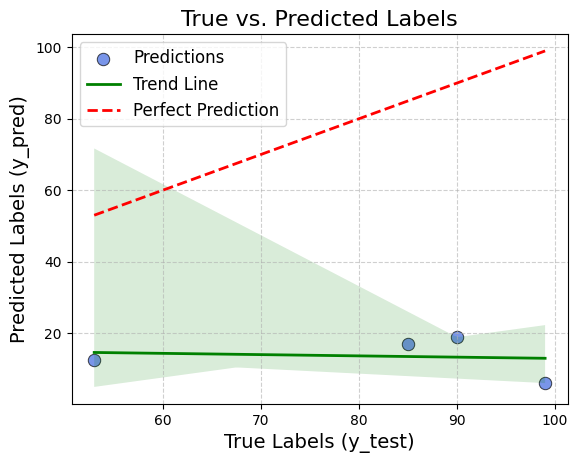

In [ ]:
plot_evaluate_model(y_test, model_5_preds)

# Model 6: PLSR egression

In [ ]:
model_6 = sk_cross_decomposition.PLSRegression()

In [ ]:
model_6.fit(X_train, y_train)

PLSRegression()

In [ ]:
model_6_preds = model_6.predict(X_test)
model_6_preds

array([92.66650357, 99.53787732, 53.19345271, 87.531238  ])

In [ ]:
y_test

array([90, 99, 53, 85])

In [ ]:
model_6_results = evaluate_model(y_test, model_6_preds)
model_6_results

{'MAE': 1.4822679015970444,
 'MSE': 3.4610357711864332,
 'RMSE': 1.8603859199602735,
 'MSLE': 0.00042928950413606494,
 'MAPE': 0.01712256087232421,
 'MedAE': 1.5345576628847226,
 'R2': 0.988489592114117,
 'Explained Variance': 0.9957965740541874}

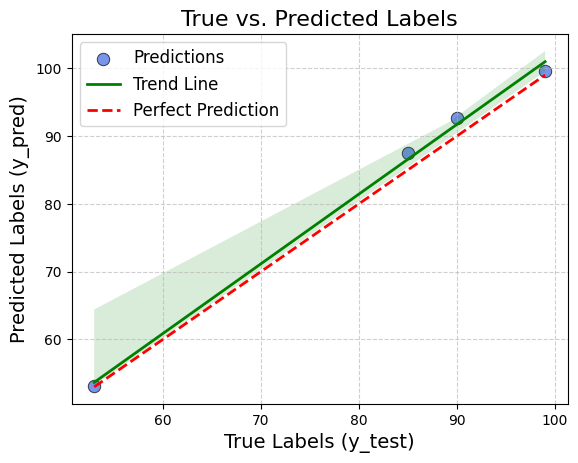

In [ ]:
plot_evaluate_model(y_test, model_6_preds)

# Model 7: Decision Tree Regression

In [ ]:
model_7 = sk_tree.DecisionTreeRegressor()

In [ ]:
model_7.fit(X_train, y_train)

DecisionTreeRegressor()

In [ ]:
model_7_preds = model_7.predict(X_test)

In [ ]:
model_7_preds

array([ 81., 107.,  64.,  89.])

In [ ]:
y_test

array([90, 99, 53, 85])

In [ ]:
model_7_results = evaluate_model(y_test, model_7_preds)
model_7_results

{'MAE': 8.0,
 'MSE': 70.5,
 'RMSE': 8.396427811873332,
 'MSLE': 0.013302344532077211,
 'MAPE': 0.10885351853720333,
 'MedAE': 8.5,
 'R2': 0.7655373103304927,
 'Explained Variance': 0.8062772812305135}

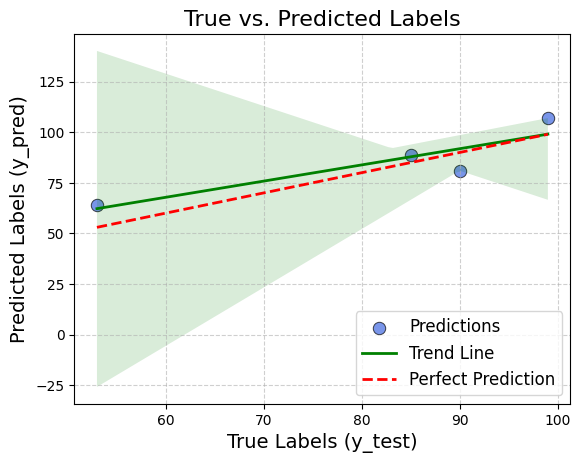

In [ ]:
plot_evaluate_model(y_test, model_7_preds)

# Model 8: Feed Forward Neural Network

In [ ]:
model_8 = sk_neural_network.MLPRegressor(
    hidden_layer_sizes=(1000,),
)

In [ ]:
model_8.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor(hidden_layer_sizes=(1000,))

In [ ]:
model_8_preds = model_8.predict(X_test)

In [ ]:
model_8_preds

array([53.83003521, 74.59471748, 93.59832539, 33.84528754])

In [ ]:
y_test

array([90, 99, 53, 85])

In [ ]:
model_8_results = evaluate_model(y_test, model_8_preds)
model_8_results

{'MAE': 38.08207128980324,
 'MSE': 1542.2281997886516,
 'RMSE': 39.271213373012195,
 'MSLE': 0.3663659218194158,
 'MAPE': 0.5040581972399858,
 'MedAE': 38.38414508947216,
 'R2': -4.129006692292336,
 'Explained Variance': -3.0773107021623725}

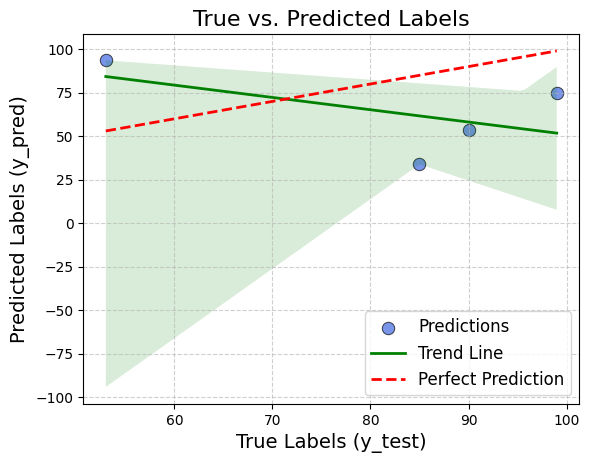

In [ ]:
plot_evaluate_model(y_test, model_8_preds)

# Model 9: Extra Tree Regression

In [ ]:
model_9 = sk_tree.ExtraTreeRegressor()

In [ ]:
model_9.fit(X_train, y_train)

ExtraTreeRegressor()

In [ ]:
model_9_preds = model_9.predict(X_test)

In [ ]:
model_9_preds

array([ 81., 107.,  64.,  88.])

In [ ]:
y_test

array([90, 99, 53, 85])

In [ ]:
model_9_results = evaluate_model(y_test, model_9_preds)
model_9_results

{'MAE': 7.75,
 'MSE': 68.75,
 'RMSE': 8.2915619758885,
 'MSLE': 0.01307957280790921,
 'MAPE': 0.1059123420666151,
 'MedAE': 8.5,
 'R2': 0.7713573061733527,
 'Explained Variance': 0.8064851382249012}

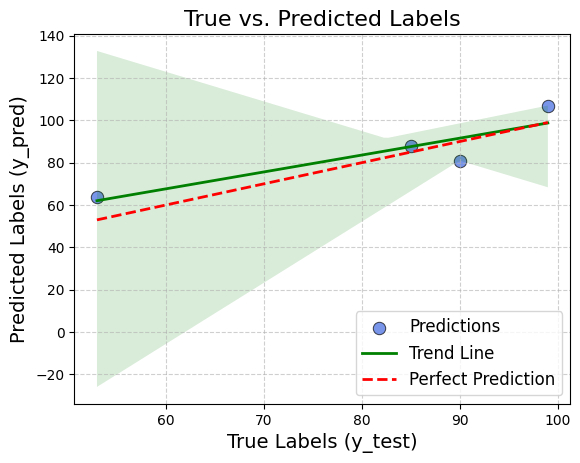

In [ ]:
plot_evaluate_model(y_test, model_9_preds)

# Model 10: Random Forest Regression

In [ ]:
model_10 = sk_ensemble.RandomForestRegressor()

In [ ]:
model_10.fit(X_train, y_train)

RandomForestRegressor()

In [ ]:
model_10_preds = model_10.predict(X_test)

In [ ]:
model_10_preds

array([87.17, 99.31, 65.83, 85.14])

In [ ]:
y_test

array([90, 99, 53, 85])

In [ ]:
model_10_results = evaluate_model(y_test, model_10_preds)
model_10_results

{'MAE': 4.0275,
 'MSE': 43.183374999999984,
 'RMSE': 6.571405861762001,
 'MSLE': 0.011612734563149563,
 'MAPE': 0.06957457202435005,
 'MedAE': 1.5700000000000003,
 'R2': 0.8563845354396176,
 'Explained Variance': 0.879083038869258}

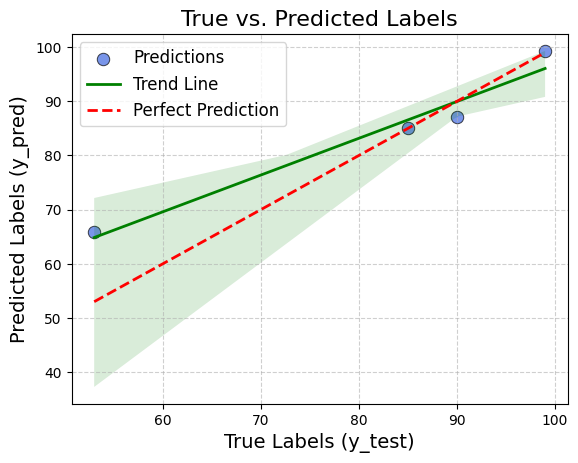

In [ ]:
plot_evaluate_model(y_test, model_10_preds)

# Plot All The Models MAE

In [ ]:
models_df = pd.DataFrame({
    "linear": [model_1_results["MAE"]],
    "support_vec": [model_2_results["MAE"]],
    "sgd": [model_3_results["MAE"]],
    "k_near_nei": [model_4_results["MAE"]],
    "guassion": [model_5_results["MAE"]],
    "plsr": [model_6_results["MAE"]],
    "decision_tree": [model_7_results["MAE"]],
    "neural": [model_8_results["MAE"]],
    "extra_tree": [model_9_results["MAE"]],
    "random_forest": [model_10_results["MAE"]]
})


In [ ]:
models_df = models_df.T

In [ ]:
models_df

,0
linear,2.230067
support_vec,17.939011
sgd,4.446932
k_near_nei,8.150000
guassion,68.189004
plsr,1.482268
decision_tree,8.000000
neural,38.082071
extra_tree,7.750000
random_forest,4.027500


In [ ]:
models_df.columns = ["MAE"]

In [ ]:
models_df

,MAE
linear,2.230067
support_vec,17.939011
sgd,4.446932
k_near_nei,8.150000
guassion,68.189004
plsr,1.482268
decision_tree,8.000000
neural,38.082071
extra_tree,7.750000
random_forest,4.027500


In [ ]:
models_df = models_df.sort_values(by="MAE", ascending=True)

In [ ]:
models_df

,MAE
plsr,1.482268
linear,2.230067
random_forest,4.027500
sgd,4.446932
extra_tree,7.750000
decision_tree,8.000000
k_near_nei,8.150000
support_vec,17.939011
neural,38.082071
guassion,68.189004


<ipython-input-108-ddeafab9c5fb>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=models_df.index, y=models_df["MAE"], palette="viridis")


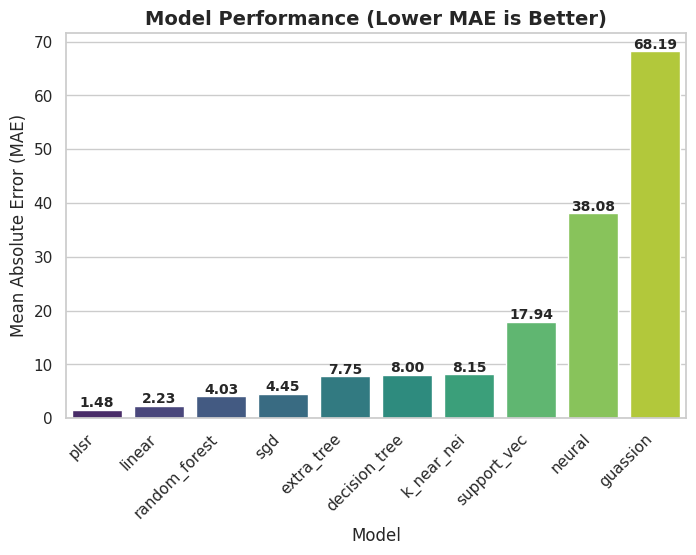

In [ ]:
sns.set_theme(style="whitegrid", palette="coolwarm")

plt.figure(figsize=(8, 5))
ax = sns.barplot(x=models_df.index, y=models_df["MAE"], palette="viridis")

plt.xlabel("Model", fontsize=12)
plt.ylabel("Mean Absolute Error (MAE)", fontsize=12)
plt.title("Model Performance (Lower MAE is Better)", fontsize=14, fontweight="bold")

plt.xticks(rotation=45, ha="right")

for p in ax.patches:
    ax.annotate(f"{p.get_height():.2f}",
                (p.get_x() + p.get_width() / 2, p.get_height()),
                ha="center", va="bottom", fontsize=10, fontweight="bold")

plt.show()

# Model 11: Matchine Learning Pipeline

In [ ]:
voting = sk_ensemble.VotingRegressor(
    estimators= [
        ("PLSR", sk_cross_decomposition.PLSRegression()),
        ("linear", sk_linear.LinearRegression()),
        ("sgd", sk_linear.SGDRegressor()),
        ("forest", sk_ensemble.RandomForestRegressor()),
        ("extra-tree", sk_tree.ExtraTreeRegressor())
    ],
)

In [ ]:
ml_model_pipeline = sk_pipeline([
    ("regressor", voting)
])

In [ ]:
ml_model_pipeline.fit(X_train, y_train)

Pipeline(steps=[('regressor',
                 VotingRegressor(estimators=[('PLSR', PLSRegression()),
                                             ('linear', LinearRegression()),
                                             ('sgd', SGDRegressor()),
                                             ('forest',
                                              RandomForestRegressor()),
                                             ('extra-tree',
                                              ExtraTreeRegressor())]))])

In [ ]:
ml_model_preds = ml_model_pipeline.predict(X_test)

In [ ]:
ml_model_preds

array([87.77156135, 99.65528048, 54.89757448, 85.61609404])

In [ ]:
y_test

array([90, 99, 53, 85])

In [ ]:
ml_model_results = evaluate_model(y_test, ml_model_preds)
ml_model_results

{'MAE': 1.3493469092515333,
 'MSE': 2.343923016542954,
 'RMSE': 1.5309875951629894,
 'MSLE': 0.0004752792097440769,
 'MAPE': 0.018607720321386263,
 'MedAE': 1.2764274767226524,
 'R2': 0.9922047873072777,
 'Explained Variance': 0.9923886492289766}

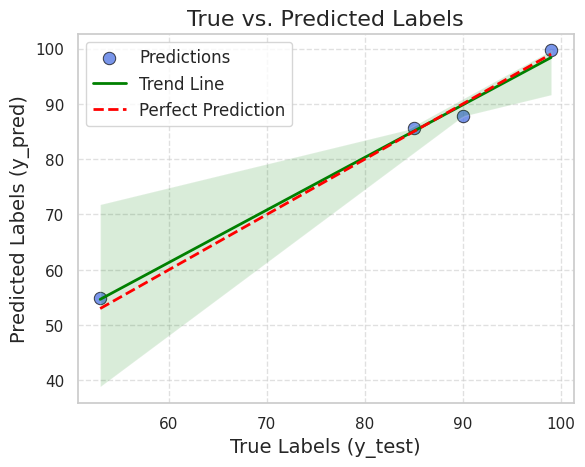

In [ ]:
plot_evaluate_model(y_test, ml_model_preds)